<a href="https://colab.research.google.com/github/hoonzi-s/S-OIL_FG_LHV/blob/main/seungminlee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from patsy import dmatrices
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
# Importing the dataset
df = pd.read_csv('FG_LHV_r1.CSV')
df.head()

,Date,FG_Press_A,FG_Press_B,FG_Press_Sum,FG_Flow_A,FG_Flow_B,FG_Flow_Sum,HTR_Flow,HTR_Inlet_Temp_r1,HTR_Outlet_Temp_r1_A,...,HTR_O2_Sum,FG_LHV,FG_LHV_r1,Offgas_S1,Offgas_S2,Offgas_S3,Offgas_S4,Offgas_S5,Offgas_S6,FG_LHV_Lab
0,2019-01-01 5:00,2.05,2.22,4.27,5972.11,6444.76,12416.87,69176.82,263.953796,286.678955,...,4.50,57.569028,28.460457,2109.866211,2073.133789,6192.540527,4131.524902,3704.548828,14473.56348,NaN
1,2019-01-02 5:00,2.05,2.23,4.28,5967.71,6457.23,12424.94,69055.50,262.675964,285.776977,...,4.17,61.655745,31.139890,2348.842285,2070.129395,6573.296387,4117.677734,4031.901123,14701.97656,38531.61501
2,2019-01-03 5:00,2.04,2.23,4.28,5976.37,6481.38,12457.75,68934.64,262.450500,286.303162,...,4.18,61.040311,31.974110,2345.879150,2063.630127,6314.607910,4109.009277,4066.921143,14543.93262,NaN
3,2019-01-04 5:00,2.04,2.22,4.26,5950.50,6449.37,12399.87,68993.98,263.477722,286.002502,...,3.67,68.800642,34.662617,2128.713623,2061.491211,6395.175781,4385.287109,3611.707520,14092.68750,38357.05076
4,2019-01-05 5:00,2.05,2.24,4.29,5964.32,6479.30,12443.63,69139.87,262.450500,286.177856,...,3.48,72.422793,38.123648,2403.566406,2062.998047,6488.336426,4096.850586,3584.061523,15362.86719,NaN


In [7]:
# Drop Unnecessary Columns
df = df.drop(['Date'], axis=1)
df.head()

,FG_Press_A,FG_Press_B,FG_Press_Sum,FG_Flow_A,FG_Flow_B,FG_Flow_Sum,HTR_Flow,HTR_Inlet_Temp_r1,HTR_Outlet_Temp_r1_A,HTR_Outlet_Temp_r1_B,...,HTR_O2_Sum,FG_LHV,FG_LHV_r1,Offgas_S1,Offgas_S2,Offgas_S3,Offgas_S4,Offgas_S5,Offgas_S6,FG_LHV_Lab
0,2.05,2.22,4.27,5972.11,6444.76,12416.87,69176.82,263.953796,286.678955,287.205139,...,4.50,57.569028,28.460457,2109.866211,2073.133789,6192.540527,4131.524902,3704.548828,14473.56348,NaN
1,2.05,2.23,4.28,5967.71,6457.23,12424.94,69055.50,262.675964,285.776977,286.303162,...,4.17,61.655745,31.139890,2348.842285,2070.129395,6573.296387,4117.677734,4031.901123,14701.97656,38531.61501
2,2.04,2.23,4.28,5976.37,6481.38,12457.75,68934.64,262.450500,286.303162,286.904480,...,4.18,61.040311,31.974110,2345.879150,2063.630127,6314.607910,4109.009277,4066.921143,14543.93262,NaN
3,2.04,2.22,4.26,5950.50,6449.37,12399.87,68993.98,263.477722,286.002502,286.678955,...,3.67,68.800642,34.662617,2128.713623,2061.491211,6395.175781,4385.287109,3611.707520,14092.68750,38357.05076
4,2.05,2.24,4.29,5964.32,6479.30,12443.63,69139.87,262.450500,286.177856,286.478516,...,3.48,72.422793,38.123648,2403.566406,2062.998047,6488.336426,4096.850586,3584.061523,15362.86719,NaN


In [8]:
# Target Variable Distribution
Target_feature = list(set(['FG_LHV_Lab']))
Target_feature = np.sort(Target_feature)

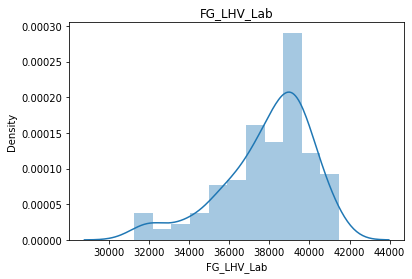

In [11]:
for col in Target_feature:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()